# Model Analysis

Because our dataset came with information about the contributors, namely their sex, age, country, and language, we can perform a bit more analysis on our model. In particular we can see if our model found any categories more challenging to predict with. Additionally, we will examine our model's confidence across different sound categories.

---

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.lines import Line2D

---

## Model Performance According to Demographic Information

It seems very unlikely that demographic information has much influence over the model's ability to predict different sounds. However, it is true that gender, age, and language have some influence on how a person sounds. Even if the chances seem slim, it seems like a good idea check how our model performs on these different categories.

In [2]:
test_data = pd.read_csv('../data/test_speaker_data.csv')
test_data

,id,sound,sex,age,country,language,pred,confidence
0,f1618,0,female,33,United States of America,EN,0,0.999987
1,m3306,0,male,32,United States of America,EN,0,0.996304
2,m2271,1,male,25,India,TA,1,0.745163
3,m1678,4,male,20,Brazil,PT,4,0.999747
4,m2954,4,male,23,Brazil,PT,4,0.959576
...,...,...,...,...,...,...,...,...
3143,m2509,0,male,27,India,EN,0,0.995636
3144,m1753,5,male,19,United States of America,EN,5,0.959312
3145,m0573,5,male,31,United States of America,EN,1,0.565160
3146,f0330,4,female,38,India,TA,2,0.780434


The strings in the `sex` and `language` columns all begin with one whitespace character. Let us remove this before we continue.

In [3]:
test_data['sex'] = test_data['sex'].str.replace(' ', '')
test_data['language'] = test_data['language'].str.replace(' ', '')

For some of our upcoming analysis it will be convenient for us to have the data split across correctly and incorrectly entries. Let us do this below.

In [4]:
correct_pred = test_data[test_data['sound'] == test_data['pred']]
incorrect_pred = test_data[test_data['sound'] != test_data['pred']]

Since our model was able to get an accuracy score of ~86%, we expect much fewer incorrect predictions. Below we see that only 418 entries of 3,148 were misclassified.

In [5]:
print(f'There are {correct_pred.shape[0]} correct predictions')
print(f'And {incorrect_pred.shape[0]} incorrect predictions.')

There are 2730 correct predictions
And 418 incorrect predictions.


#### Gender

Let us start with gender.

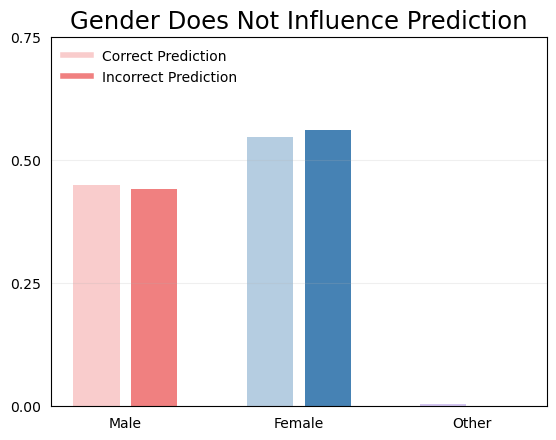

In [6]:
# create bar chart for percentage of gender that appears in correct and incorrect predictions

# bar colors for different genders
colors = {'male': 'steelblue', 'female': 'lightcoral', 'other': 'mediumpurple'}
# group dfs to iterate over
dfs = [correct_pred, incorrect_pred]

# increment bar position
i = 1


for sex in ['female', 'male', 'other']:
    for n in range(2):
        df = dfs[n]
        
        # other does not appear in incorrect predictions
        # had to create a try/except block for this method
        try:
            percentage = df['sex'].value_counts(normalize = True)[sex]
        except:
            # percentage for other is 0 for incorrect predictions
            percentage = 0
        
        # change shading for correct predictions
        alpha = 1
        if n == 0:
            alpha = 0.4
        
        color = colors[sex]
        plt.bar(i, percentage, color = color, alpha = alpha)
        
        i += 1
    
    i += 1

plt.title('Gender Does Not Influence Prediction', size = 17.5)
plt.xticks(ticks = [1.5, 4.5, 7.5], labels = ['Male', 'Female', 'Other'])
plt.yticks([0, 0.25, 0.5, 0.75])

# remove tick marks
plt.tick_params(axis = 'both', bottom = False, left = False)
plt.grid(axis = 'y', alpha = 0.2)

# create legend for plot
custom_lines = [Line2D([0], [0], color='lightcoral', lw=4, alpha = 0.4),
                Line2D([0], [0], color='lightcoral', lw=4)]

plt.legend(custom_lines, ['Correct Prediction', 'Incorrect Prediction'], frameon = False, loc = 'upper left')

plt.savefig('../images/sex_predictions.jpg');

The distribution genders looks very similar across correct and incorrect predictions. Gender does not seem to influence model performance.

#### Age

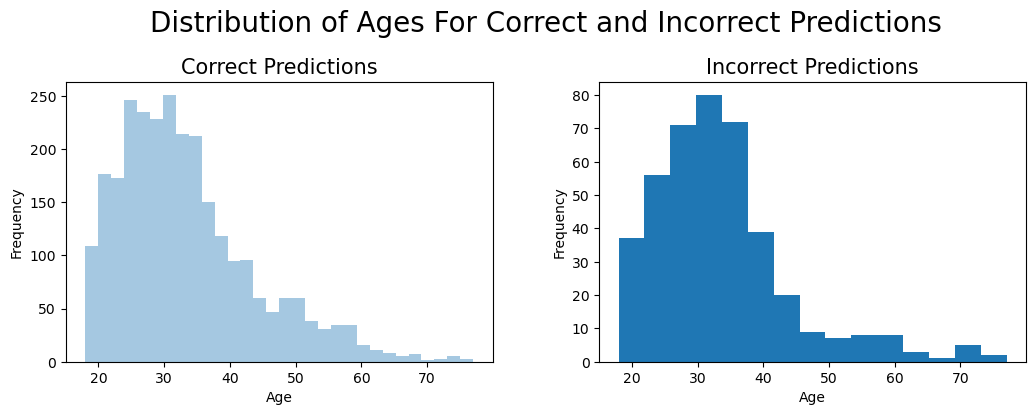

In [7]:
plt.figure(figsize = (12,4))

plt.suptitle('Distribution of Ages For Correct and Incorrect Predictions', size = 20)
plt.subplot(1,2,1)
plt.title('Correct Predictions', size = 15)
plt.hist(correct_pred['age'], bins = 30, alpha = 0.4)
plt.xlabel('Age')
plt.ylabel('Frequency')


plt.subplot(1,2,2)
plt.title('Incorrect Predictions', size = 15)
plt.hist(incorrect_pred['age'], bins = 15)
plt.xlabel('Age')
plt.ylabel('Frequency')


# adjust spacing between and around subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.8,
                    wspace=0.25,
                    hspace=0.4)

plt.savefig('../images/age_dist_predictions.jpg');

Overall, the two distributions look fairly similar and do not contain many notable differences. Two very slight differences are:
- the peak of the distribution of incorrect predictions is a is slightly more right leaning than the distribution for correct predictions
- the volume around age 50 is a bit lower for incorrect predictions

These differences may just be due to there being a small number of incorrect predictions, though. It does not seem like a conclusion can really be drawn.

#### Language

In [8]:
correct_pred['language'].value_counts(normalize = True).round(2).head(5)

EN    0.69
PT    0.08
IT    0.06
TA    0.03
HI    0.03
Name: language, dtype: float64

In [9]:
incorrect_pred['language'].value_counts(normalize = True).round(2).head(5)

EN    0.58
PT    0.08
TA    0.08
IT    0.08
HI    0.04
Name: language, dtype: float64

It does not appear that sex have much influence on whether or not the model performs well. It is hard to say if language has much impact. The language class is very imbalanced and the number of incorrect predictions on the test set is small (418 entries). English does makes up a notably smaller percentage of the incorrect predictions. It also appears that Tamil (`TA`)  has more representation in the incorrect predictions set than the correct predictions set.

Below we look at the true sound labels for predictions that were both incorrect and came from someone who speaks Tamil. The goal is to see if any sound is linked with the language's higher representation in the incorrectly predicted dataset. The values counts between each sound only differs by one or two which is not really suggestive of anything meaningful. 

In [10]:
incorrect_pred.loc[incorrect_pred['language'] == 'TA', 'sound'].value_counts()

1    7
3    6
2    6
5    5
0    5
4    5
Name: sound, dtype: int64

---

## Confidence Levels

For each audio clip, our model generates a set of probabilities for each sound category. The sound category with the largest probability is the one the model chooses as its prediction. Sometimes these probabilities are high, and sometimes they are low. 

One way to view these probabilities is as a level of confidence. Below we take a look at confidence levels from several different perspectives.

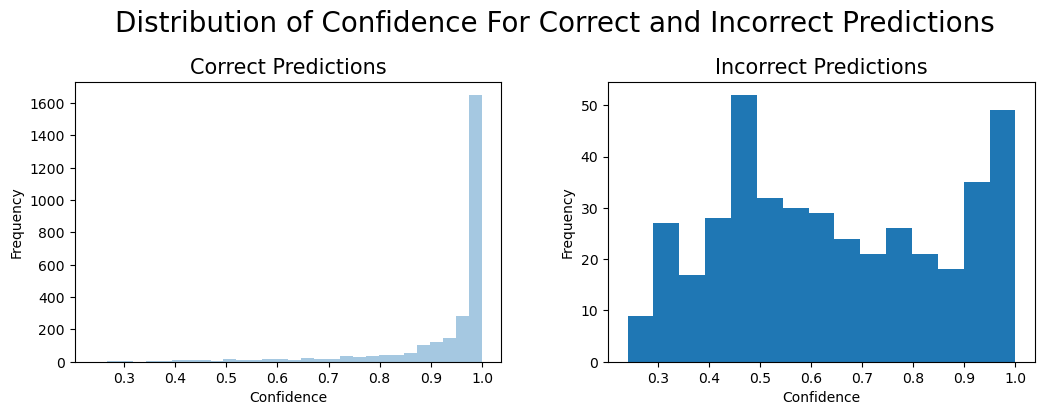

In [11]:
plt.figure(figsize = (12,4))

plt.suptitle('Distribution of Confidence For Correct and Incorrect Predictions', size = 20)
plt.subplot(1,2,1)
plt.title('Correct Predictions', size = 15)
plt.hist(correct_pred['confidence'], bins = 30, alpha = 0.4)
plt.xlabel('Confidence')
plt.ylabel('Frequency')


plt.subplot(1,2,2)
plt.title('Incorrect Predictions', size = 15)
plt.hist(incorrect_pred['confidence'], bins = 15)
plt.xlabel('Confidence')
plt.ylabel('Frequency')


# adjust spacing between and around subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.8,
                    wspace=0.25,
                    hspace=0.4)

plt.savefig('../images/conf_dist_preds.jpg');

We see a strong left skew in the distribution of confidence levels for correct predictions. For incorrect predictions, we see much more frequent low confidence values (relatively). The most frequent confidence level bins occur around at a confidence level around 0.5 and 1. The value of 1 suggests that there are quite a few confident predictions that are incorrect.

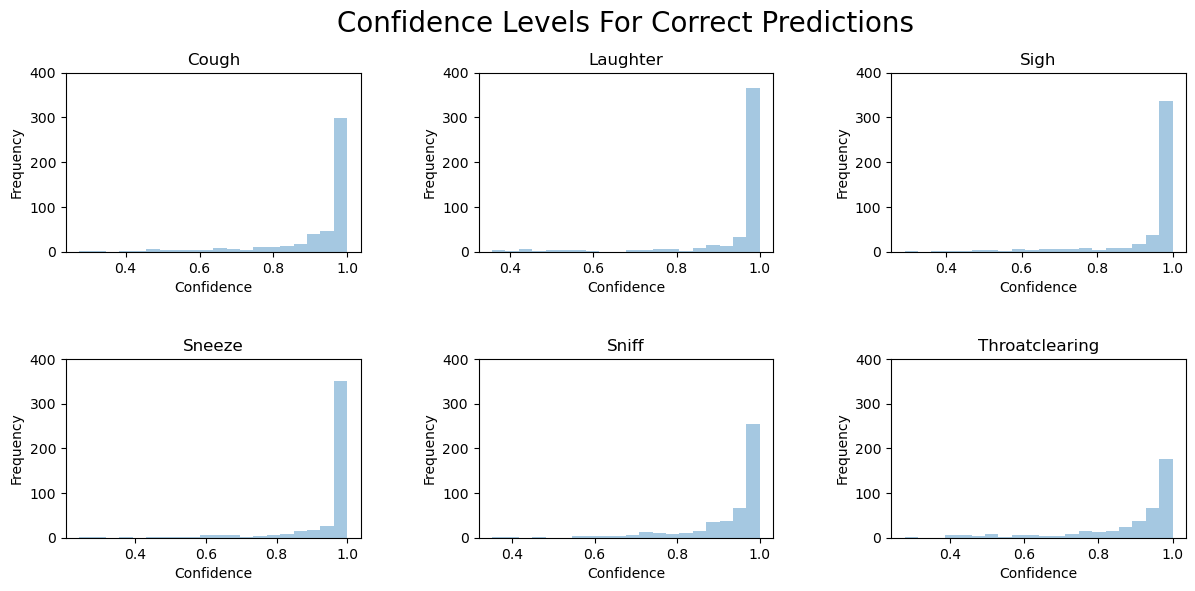

In [12]:
sound_label = ['Cough', 'Laughter', 'Sigh', 'Sneeze', 'Sniff', 'Throatclearing']

plt.figure(figsize = (14,6))
plt.suptitle('Confidence Levels For Correct Predictions', size = 20)

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.title(sound_label[i])
    # subset data by sound (cough, laughter, etc)
    corr_sound = correct_pred[correct_pred['sound'] == i]
    plt.hist(corr_sound['confidence'], bins = 20, alpha = 0.4)
    plt.xlabel('Confidence')
    plt.ylabel('Frequency')
    plt.ylim([0,400])
    
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.875,
                    wspace=0.4,
                    hspace=0.6)

plt.savefig('../images/conf_dist_by_sound.jpg');

The confidence distributions are all heavily skewed right. The distributions that are smaller and contain weaker skews correspond to coughs, sniffs, and throatclearing. This suggests that the model is generally less confident with these sounds and more frequently labels these sounds incorrectly.

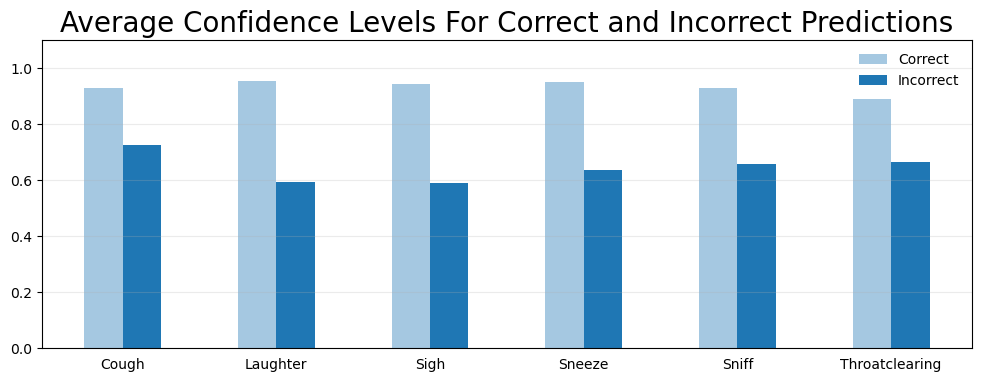

In [13]:
plt.figure(figsize = (12,4))

sound_label = ['Cough', 'Laughter', 'Sigh', 'Sneeze', 'Sniff', 'Throatclearing']

# collect mean confidence levels for each sound for correct and incorrect predictions
correct_conf = correct_pred.groupby('sound')['confidence'].mean()
inc_conf = incorrect_pred.groupby('sound')['confidence'].mean()

plt.title('Average Confidence Levels For Correct and Incorrect Predictions', size = 20)

# np array for bar positions for easy horizontal shift (via addition)
pos = np.array([0,1,2,3,4,5])

# bars for correct predictions
plt.bar(pos, correct_conf, width = 0.25, color = 'tab:blue', alpha = 0.4, label = 'Correct')
# bars for incorrect predictions
plt.bar(pos +0.25, inc_conf, width = 0.25, color = 'tab:blue', label = 'Incorrect')

# convert labels from numbers to sound names
plt.xticks(pos + 0.125, labels = sound_label)
plt.ylim([0,1.1])
plt.grid(axis = 'y', alpha = 0.25)
plt.tick_params(bottom = False)

plt.legend(frameon = False)

plt.savefig('../images/avg_conf_preds.jpg');

Above we see that the average confidence levels for correct cough, sniff, and throatclear predictions are noticably smaller than for laughter, sigh, and sneeze. The most notable takeaway from the image is that the average confidence for mislabelling a cough is very hiegh. Interestingly, this is somewhat true for sniff and throatclear too.

The gap between the laughter bars and the sigh bars is very large and tells us that the model typically only gets these wrong if it is very unconfident.

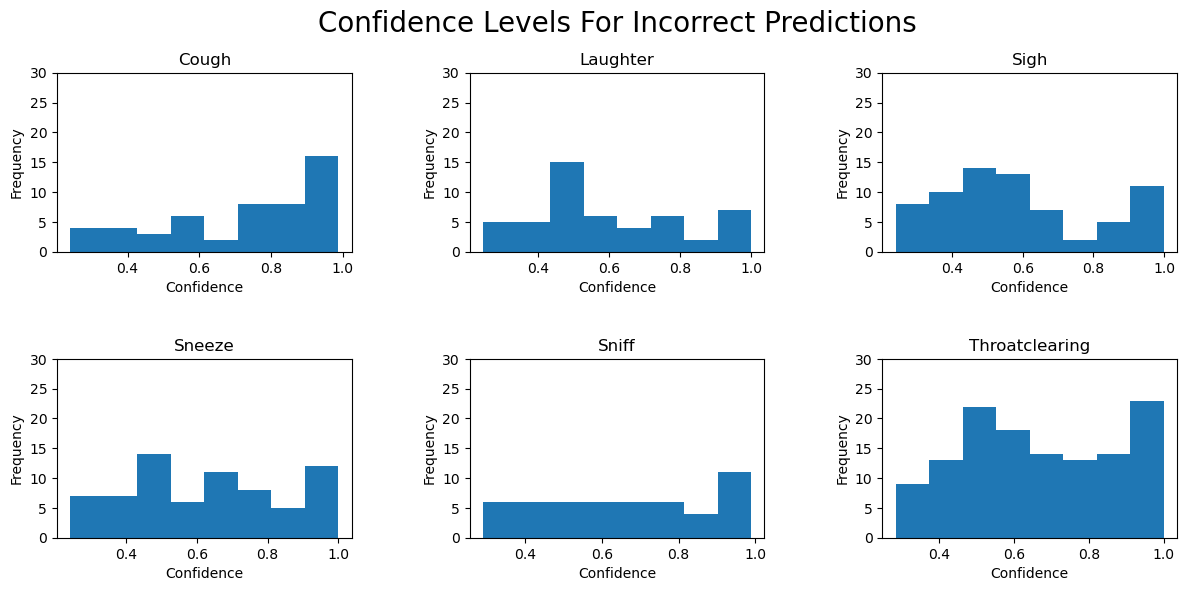

In [14]:
sound_label = ['Cough', 'Laughter', 'Sigh', 'Sneeze', 'Sniff', 'Throatclearing']

plt.figure(figsize = (14,6))
plt.suptitle('Confidence Levels For Incorrect Predictions', size = 20)

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.title(sound_label[i])
    
    # subset data by sound (cough, laughter, etc)
    inc_sound = incorrect_pred[incorrect_pred['sound'] == i]
    plt.hist(inc_sound['confidence'], bins = 8)
    plt.xlabel('Confidence')
    plt.ylabel('Frequency')
    plt.ylim([0,30])
    
    
    
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.875,
                    wspace=0.4,
                    hspace=0.6)

plt.savefig('../images/conf_dist_by_sound_incorrect.jpg')

Outside of coughing, the distributions seem fairly uniform. This suggest that when the model predicts incorrectly, it does so fairly evenly across all different confidence levels. For coughs (and slightly for throat clears) there are more instances where the model is very confident in its decision but still wrong.